## Assignment 2
## P556: Applied Machine Learning
### Due date: Saturday, March 2, 11:59PM

# Problem 1

## Problem 1.1 (40 points)

Implement a multi-class logistic regression model.

The l2_reg parameter is used for L2-Regularization. The default value is 0, which means no regularization. Non-0 values will be used to pass the corresponding lambda value. 

The iters parameter sets the maximum number of times that we will update the weights.

The early_stopping parameter will be used to set a threshold that will cause the model to stop training when the loss between iterations is equal or less than the parameter value.

In [131]:
# Logistic regression code
def logistic_regression(X, y, iters=50, early_stopping=0, l2_reg=0):
    X = np.insert(X, 0, np.ones(len(X)), axis = 1)
    one_vs_all = []
    for num in np.unique(y):
        temp_y = np.copy(y)
        temp_y[temp_y == num] = -1
        temp_y[temp_y!=-1] = 0 
        temp_y[temp_y == -1] = 1
        one_vs_all.append(temp_y)
    errors = []
    thetas = []
    prev_error = 0
    for y in one_vs_all:
        errors = []
        theta = np.zeros(len(X[0]))
        prev_error = 0
        for it in range(0,iters):
            t_transpose = np.transpose(theta)
            result = np.dot(X,t_transpose)
            predictions = 1/(1+np.exp(-result))
            pred_error = predictions - y
            delta = np.dot(np.transpose(pred_error),X)/len(X)
            if(l2_reg!=None):
                delta[1:]+=(l2_reg * theta[1:])/len(X)
            theta = theta - 0.1*delta
            error = (-y * np.log(predictions) - (1 - y) * np.log(1 - predictions))/len(X)
            errors.append(sum(error))
            if(abs(sum(error) - prev_error)<= early_stopping):
                break
            prev_error = sum(error)
        thetas.append(theta)
    return thetas

## Problem 1.2 (10 points)

Test your model using the three class dataset that we have included in the next cell. Using the following regularization values: None, 0.5, 10.0. Which of the values gives a better threshold?

For training data, I am getting same accuracy for L2_reg = 0.0 and L2_reg = 0.5.  
Accuracies for training data:  
L2_reg = None Accuracy = 96.0  
L2_reg = 0.5  Accuracy = 96.0  
L2_reg = 10.0 Accuracy = 95.6  

But when I used new larger data, for L2_reg = None. I am getting best accuarcy.  
L2_reg = None Accuracy = 95.32000000000001      
L2_reg = 0.5  Accuracy = 95.306    
L2_reg = 10.0 Accuracy = 95.07100000000001    

In [132]:
from sklearn.datasets import make_blobs
import numpy as np

centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
X1, y1 = make_blobs(n_samples=100000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)
X1 = np.dot(X1, transformation)

In [133]:
lambda_values = [None,0.5,10.0]
weights = []
for l in lambda_values:
    weights.append(logistic_regression(X, y,1000, 0, l))

X = np.insert(X, 0, np.ones(len(X)), axis = 1)
X1 = np.insert(X1, 0, np.ones(len(X1)), axis = 1)

TP = 0
hypothesis = []
accuracies = []
for w in weights:
    TP = 0
    for tup in zip(X1,y1):
         hypothesis = []
         z1 = np.dot(tup[0],w[0])
         h1 = 1/(1+np.exp(-z1))
         hypothesis.append(h1)
         z2 = np.dot(tup[0],w[1])
         h2 = 1/(1+np.exp(-z2))
         hypothesis.append(h2)
         z3 = np.dot(tup[0],w[2])
         h3 = 1/(1+np.exp(-z3))
         hypothesis.append(h3)
         if(hypothesis.index(max(hypothesis)) == tup[1]):
             TP+=1
    accuracy = (TP/len(X1))*100 
    accuracies.append(accuracy)

for a in zip(accuracies,lambda_values):
    print("Accuarcy for l2_reg: {} is {} %".format(a[1],a[0]))

Accuarcy for l2_reg: None is 95.32000000000001 %
Accuarcy for l2_reg: 0.5 is 95.306 %
Accuarcy for l2_reg: 10.0 is 95.07100000000001 %


# Problem 2

## Problem 2.1 (5 points)

Consider the binary classification problem of mapping a given input to two classes. Let $\mathcal{X}=\mathbb{R}^d$ and $\mathcal{Y}=\{+1, -1\}$ be the input space and output space, respectively. In simple words, it means that the input has $d$ features and all of them are real valued, whereas the output can only take values $-1$ or $+1$. This is one of the most common problems in machine learning and many sophisticated methods exist to solve it. In the question, we will solve it using the concepts we have already learned in class. Like we did in linear regression, let us assume the two sets of points can be separated using a straight line i.e. the samples are linearly separable. So if $d=2$, one should be able to draw a line to distinguish between the two classes. All points lying on side of the line should belong to a particular class (say $1$) and the points lying on the other side should belong to another class (say $2$). To see what this would look like,  your first task is as follows:

Write a function that will randomly generate a dataset for this problem. Your function should randomly choose a line $l$, which can be denoted as $ax + by + c = 0$. According to basic high school geometry, the line divides the plane into two sides. On one side, $ax+by+c>0$ while on the other $ax+by+c<0$. Use this fact to randomly generate $k_0$ points on the side of class 0 (i.e. $y=-1$) and $k_1$ points on the side of class 1 (i.e. $y=1$). Use the function you wrote in the previous assignment to plot this dataset!model. Note: cannot use the name 'perceptron' nor binary classification, that would make it way too easy to look up in Google.

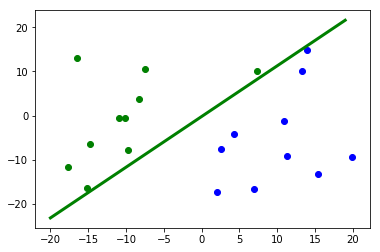

In [122]:
import random
import matplotlib.pyplot as plt

def generate_dataset(k0, k1):
  """
  Your code for generating the dataset goes here! The output should X and y.
  You should call the visualization function from this function. Every time we 
  run this cell, it should plot a new dataset along with the line which was used
  to generate that dataset. We will test this by changing the values of k and
  running the cell multiple times
  Input: k0 = number
          k1 = number
  Output: X = An (m x d) dimension numpy array where m is the number of samples and d is the number of features
          y = (m x 1) dimension vector where m is the number of samples
  """
  """
  Generating the points in the range -20 to 20. Here I am assuming d = 2.
  """
  a = random.uniform(-20,20)
  b = random.uniform(-20,20)
  while(1):
      if(b!=0):
          break
      b = random.uniform(-20,20)
  c = random.uniform(-20,20)
  class1 = []
  class2 = []
  class1_label = []
  class2_label = []
  while(len(class1) < k0 or len(class2) < k1):
    x = random.uniform(-20,20)
    y = random.uniform(-20,20)
    if((a*x+b*y+c)< 0 and len(class1)<k0):
        class1.append((x,y))
        class1_label.append(-1)
    elif((a*x+b*y+c)>0 and len(class2)<k1):
        class2.append((x,y))
        class2_label.append(1)
  x_list = []
  y_list = []
  for x in range(-20,20):
    x_list.append(x)
    y = -(a*x+c)/b 
    y_list.append(y)

  plt.plot(x_list,y_list,linewidth = 3,color = "g")

  x_list = []
  y_list = []
  for tup in class1:
    x_list.append(tup[0])
    y_list.append(tup[1])
  plt.scatter(x_list,y_list,color = 'g')

  x_list = []
  y_list = []
  for tup in class2:
    x_list.append(tup[0])
    y_list.append(tup[1])
  plt.scatter(x_list,y_list,color = 'b')
  X = class1+class2
  y = class1_label + class2_label
  return np.array(X),np.array(y)

X,y = generate_dataset(10, 10)

## Problem 2.2 (35 points)

When you are given a dataset for which you do not have access the the target function $f$ which maps $\mathcal{X}$ to $\mathcal{Y}$. You learn it from the data. In this problem, it is akin to learning the parameters of the line that separates the two classes. The same line above can be represented as $$\sum_{i=0}^d w_i x_i = 0$$
Notice that $i$ starts from $0$, instead of $1$. Can you think of why?

The goal here is to correctly find out $\bf{w}$. The algorithm to find it is a simple iterative process. 

1. Randomly choose a $\mathbf{w}$ to begin with.
2. Keep on adjusting the value of $\bf{w}$ as follows until all data samples are correctly classified:
    1. Randomly choose a sample from the dataset without replacement and see if it is correctly classified. If yes,  move on to another sample.
    2. If not,  then  update the weights as $\mathbf{w}^{t+1} = \mathbf{w}^t + y \cdot \mathbf{x}$
    and go back to the previous step (of randomly chosing a sample)
    
        - $\mathbf{w}^{t+1}$ is value of $\mathbf{w}$ at iteration $t+1$
        - $\mathbf{w}^{t}$ is value of $\mathbf{w}$ at iteration $t$
        - $y$ is the class label for the sample under consideration
        - $\mathbf{x}$ is the data-point under consideration
    
    
Write a function that implements this learning algorithm. The input to the function is going to be a dataset represented by the input variable $X$ and the target variable $y$. The output of the function should be the chosen $\mathbf{w}$.





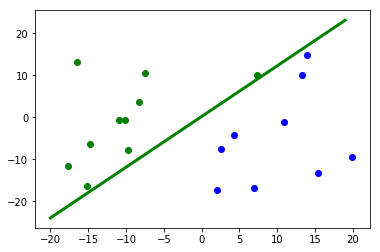

In [124]:
def fit(X, y):
  """
  Your code for Problem 2.2 goes here. Apart from writing the fit function,
  you should also write code to not only plot the points in the dataset,
  but also plot the learned line represented by w. We will test this, by running 
  the cell for task 1 (thus generating a new dataset) and then running this cell.
  Even though the visualization is done for d=3 and 2-D points, your code should be
  generic and be able to handle any d. This will also be tested.
  
  INPUT: The output of generate_data() will go as input to this function. See 
  its definition for the dimensions of X and y
  Output: The final weight vector w.
  """
  """
  Generating the points in the range -20 to 20. Here I am assuming d = 2.
  """
  X = np.insert(X, 0, np.ones(len(X)), axis = 1)
  w = np.zeros(len(X[0]))
  X_new = X.tolist()
  i = 0
  for i in range(1000):    
    X = np.copy(X_new)
    target = np.copy(y)
    X = X.tolist()
    target = target.tolist()
    i =  0
    while(len(X)>0):
        x = random.choice(X)
        y1 = target[X.index(x)]
        del target[X.index(x)]
        del X[X.index(x)]
        val = np.dot(x,np.transpose(w))
        if(val > 0 and y1 == 1):
            continue
        elif(val < 0 and y1 == -1):
            continue
        else:
            w = w + np.dot(y1,x)

    x_list = []
    y_list = []
    i = 0
    for x in range(-20,20):
            x_list.append(x)
            y = -(w[1]*x+w[0])/w[2] 
            y_list.append(y)

    plt.plot(x_list,y_list,linewidth = 3,color = "g")

    x_list = []
    y_list = []
    for tup in X_new[:10]:
        x_list.append(tup[1])
        y_list.append(tup[2])
    plt.scatter(x_list,y_list,color = 'g')

    x_list = []
    y_list = []
    for tup in X_new[11:]:
        x_list.append(tup[1])
        y_list.append(tup[2])
    plt.scatter(x_list,y_list,color = 'b')
    return w

weights = fit(X,y)

### Problem 2.3 (5 points)
Give an intuition of why the above algorithm converges for linearly separable data? We do not expect you to give a mathematic proof, but it would be great if you can provide one. You will get full points even if you just provide an intuition of a few lines. Including figures or mathematical equations is encouraged but not required.

Initially, all the weights are zero and we are updating the weights only if the current training example is not correclty classified by the line. So for each misclassified point we are updating slope and intercept i.e. increasing or decreasing slope and intersept. As we are penalizing weights whenever the line is misclassifying so eventually converge and we will be getting slope and intersept of line which can separated two classes.

As per the given equation, we are increasing weights when class label: 1 is missclassified as -1 as we are adding y * x in weights and decreasing weights when class label: -1 is missclassified as 1 as we are adding y * x in weights.

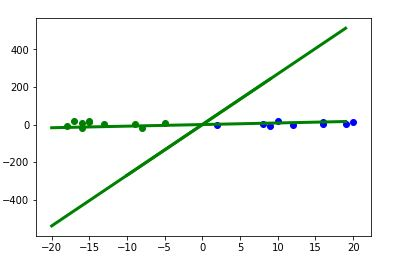

for features [1, -17, 20] and class label 1,there is no line as all weights are zero so we are updating the weights as.

w = w + y.x

w = [  1, -17,  20]

This is the horizontal line from the graph with slope = -17/20 and intercept = 1/20

For second feature [1, 10, 19]  and class label -1 which is misclassified by line, we are updating weights again.

updated w = [  0. -27.   1.]

So we got a line passing throught origin with slope = -27

So we are moving the line in the 2d-space by changing the intercept and rotating the line by changing the slope.


### Problem 2.4 (5 points)
What happens when the data is not linearly separable? What can be done to salvage the situation?

It will difficult to classify non-linear data by single linear classifier and if we try to classify data with linear classifier it will not converge and give very low accuarcy. For non-linearly separable data, we can use polynomial equation i.e. classifying the data in higher dimentions. Also we can use multiple linear classifliers to correctly classify data. In first example, we have used multiple linear classifier by using one vs all paradigm. We can also use support vectore machines or neural network for non-linear classification.



References:

https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975                     
https://mlalgorithm.wordpress.com/tag/non-linearly-separable               
https://medium.com/@vivek.yadav/how-neural-networks-learn-nonlinear-functions-and-classify-linearly-non-separable-data-22328e7e5be1